In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
df = pd.read_csv("C:/Users/KE/Desktop/RI.csv")
df.head()

,ID,Recipe,Ingredients
0,0,"Basil, Roasted Peppers and Monterey Jack Cornb...",unsalted butter
1,1,Crispy Cheese Twists,parmesan cheese
2,2,Mom's Yeast Rolls,hot water
3,3,Sweet Potato Bread I,white sugar
4,4,Orange Buns,butter


In [3]:
print(len(df['Recipe'].unique()))
print(len(df['Ingredients'].unique()))

100
175


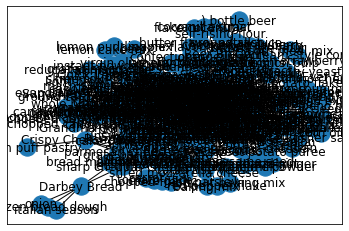

In [60]:
g = nx.from_pandas_edgelist(df, source = 'Recipe', target = 'Ingredients')

nx.draw_networkx(g)

In [5]:
#for i, elrow in df.iterrows():
#    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [6]:
#len(g.edges())
#g.edges()

In [61]:
g.add_nodes_from(nodes_for_adding=df.Recipe.tolist())
#len(g.nodes())
#g.nodes()

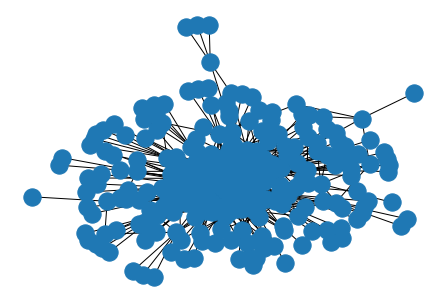

In [8]:
nx.draw(g)

In [70]:
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool, TapTool, BoxSelectTool, WheelZoomTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4



plot = Plot(plot_width=800, plot_height=800, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Food Graph Interaction"

graph_renderer = from_networkx(g, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[2])

graph_renderer.edge_renderer.glyph = MultiLine(line_color=Spectral4[0], line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[1], line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[2], line_alpha=0.8, line_width=1)

#source = ColumnDataSource(data=dict('Recipe'=df['Recipe'], 'Ingredients'=df['Ingredients']))

graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)
Tooltips = [("Recipe", "@index")]
plot.add_tools(HoverTool(tooltips = Tooltips), TapTool(), BoxSelectTool(), BoxZoomTool(), WheelZoomTool(), ResetTool())

output_notebook()
output_file("output.html")
show(plot)


Loading BokehJS ...

In [65]:
class Vertex:
    def __init__(self, key):
        # unique ID for vertex
        self.id = key
        # dict of connected nodes
        self.connected_to = {}
    
    def add_neighbor(self, neighbor, weight=0):
        # Add an entry to the connected_to dict with a given
        # weight 
        self.connected_to[neighbor] = weight
        
    def __str__(self):
        # override __str__ for printing
        return(str(self.id) + ' connected to: ' + str([x.id for x in self.connected_to]))
    
    def get_connections(self):
        # return keys from connected_to dict
        return self.connected_to.keys()
    
    def get_id(self):
        # return vertex id's
        return self.id
    
    def get_weight(self):
        # return weights of edges connected to vertex
        return self.connected_to[neighbor]
class Graph:
    def __init__(self):
        # dictionary of vertices
        self.vertices_list = {}
        # vertex count
        self.num_vertices = 0
        
    def add_vertex(self, key):
        # increment counter when adding vertex
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(key)
        self.vertices_list[key] = new_vertex
        return new_vertex
    
    def get_vertex(self, n):
        # check if vertex exists, return if True
        if n in self.vertices_list:
            return self.vertices_list[n]
        else:
            return None
        
    def __contains__(self, n):
        # override __contains__ to list all vertices in Graph object
        return n in self.vertices_list
    
    def add_edge(self, s, f, cost=0):
        # add edge to graph; s = start node; e = end node
        if s not in self.vertices_list:
            nv = self.add_vertex(s)
        if f not in self.vertices_list:
            nv = self.add_vertex(f)
        self.vertices_list[s].add_neighbor(self.vertices_list[f], cost)
        
    def get_vertices(self):
        # return keys of vertices in Graph
        return self.vertices_list.keys()
    
    def __iter__(self):
        # override __iter__ to return iterable of vertices
        return iter(self.vertices_list.values())
    

In [36]:
g = Graph()
node_names = df['Recipe']

In [68]:
for i, name in enumerate(node_names, 1):
    g.add_vertex(name)
    #g.add_edge(df['Recipe'][i], df['Ingredients'][i])

AttributeError: 'Graph' object has no attribute 'add_vertex'

In [67]:
a = df['Recipe'][1]
b = df['Ingredients'][1]
print(a,b)

Crispy Cheese Twists parmesan cheese


In [54]:
g.add_edge(a,b)


In [58]:
g.edges()

EdgeView([('Basil, Roasted Peppers and Monterey Jack Cornbread', 'unsalted butter'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'chopped onion'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'cornmeal'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'all-purpose flour'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'white sugar'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'baking powder'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'salt'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'baking soda'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'buttermilk'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'egg'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'shred pepperjack cheese'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'frozen corn kernel'), ('Basil, Roasted Peppers and Monterey Jack Cornbread', 'red bell pepper'), ('unsalted butter', 'Babka I'), ('unsalted butter

In [66]:
for v in g:
    for w in v.get_connections():
        print("(%s, %s)" % (v.get_id(), w.get_id()))

AttributeError: 'str' object has no attribute 'get_connections'

In [64]:
for i in node_names:
    print(g.get_vertex(i))

AttributeError: 'Graph' object has no attribute 'get_vertex'

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


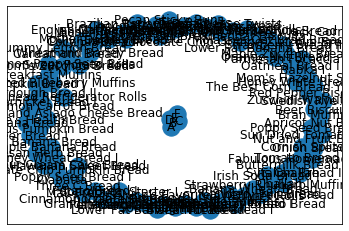

In [31]:
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

networkx_graph = nx.Graph()

for node in node_names:
    networkx_graph.add_node(node)

networkx_graph.add_edges_from(edges)

nx.draw_networkx(networkx_graph)

1